### Predicting House with size

#### URLS

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>url</th>
      <th>checkbox</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>18</th>
      <td><a href="https://player.vimeo.com/video/656685229?h=b668f12bc1">https://player.vimeo.com/video/656685229?h=b668f12bc1</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>19</th>
      <td><a href="https://player.vimeo.com/video/656684478?h=87d29a2ba6">https://player.vimeo.com/video/656684478?h=87d29a2ba6</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>20</th>
      <td><a href="https://player.vimeo.com/video/656684245?h=f96cf91211">https://player.vimeo.com/video/656684245?h=f96cf91211</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>21</th>
      <td><a href="https://player.vimeo.com/video/656684037?h=f30c2b4dfc">https://player.vimeo.com/video/656684037?h=f30c2b4dfc</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>22</th>
      <td><a href="https://player.vimeo.com/video/656683862?h=886904448d">https://player.vimeo.com/video/656683862?h=886904448d</a></td>
      <td><input type="checkbox"></td>
    </tr>
  </tbody>
</table>

In [75]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression   #Build our linear regression model
from sklearn.metrics import mean_absolute_error #Evaluate our model
from sklearn.utils.validation import check_is_fitted    #
warnings.simplefilter(action="ignore",category=FutureWarning)

#### Data Wrangling

- Reshaping DataSets
- Merging DataSets
- Creating new variables
- Filtering and Subsetting
- Data type Conversions
- Aggregating data

<p style="color:orange">Subsetting a Dataset</p>

In [76]:
def get_data(filepath):
    df = pd.read_csv(filepath)
    return df

In [77]:
df = get_data("./data/buenos-aires-real-estate-1.csv")
print("df shape: ", df.shape)
df.head()

df shape:  (8606, 17)


,Unnamed: 0,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


In [78]:
# Check our work
assert(
    len(df)<=8606
), f"`df` should have no more thatn 8606 observations, not {len(df)}"

In [79]:
 #Subset to properties in "Capital Federal"
df = df[df["place_with_parent_names"].str.contains("Capital Federal")]
#Subet to apartments
df = df[df["property_type"]=="apartment"]   

In [80]:
df.currency.unique()

array(['USD', nan, 'ARS'], dtype=object)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2068 entries, 0 to 8604
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2068 non-null   int64  
 1   operation                   2068 non-null   object 
 2   property_type               2068 non-null   object 
 3   place_with_parent_names     2068 non-null   object 
 4   lat-lon                     1984 non-null   object 
 5   price                       1944 non-null   float64
 6   currency                    1944 non-null   object 
 7   price_aprox_local_currency  1944 non-null   float64
 8   price_aprox_usd             1944 non-null   float64
 9   surface_total_in_m2         1430 non-null   float64
 10  surface_covered_in_m2       1859 non-null   float64
 11  price_usd_per_m2            1314 non-null   float64
 12  price_per_m2                1752 non-null   float64
 13  floor                       533 non-nu

In [82]:
#Subset to properties where "price approx usd" is less than 400000
df = df[df["price_aprox_usd"]<400_000] 

#### Exploratory Data Analysis

<p style="color:orange">Histogram of Area of House</p>

In [83]:
df.head()

,Unnamed: 0,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
11,11,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6050060697,-58.4001162302",60000.0,USD,909744.0,60000.0,28.0,28.0,2142.857143,2142.857143,NaN,1.0,NaN,http://once.properati.com.ar/zz0q_venta_depart...
20,20,sell,apartment,|Argentina|Capital Federal|San Nicolás|,"-34.603898,-58.378617",69000.0,USD,1046205.6,69000.0,NaN,22.0,NaN,3136.363636,23.0,2.0,NaN,http://san-nicolas.properati.com.ar/rnju_venta...


Text(0.5, 1.0, 'Distribution of Aparment Sizes')

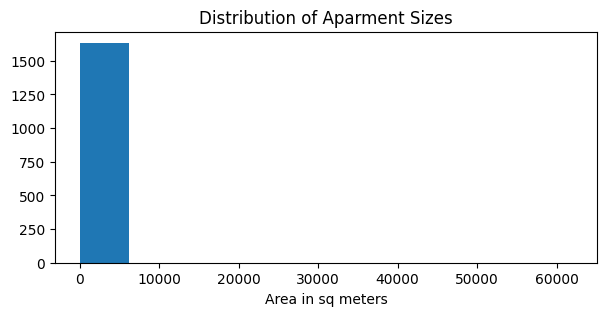

In [84]:
fig,ax = plt.subplots(figsize=(7,3))
ax.hist(df["surface_covered_in_m2"])
ax.set_xlabel("Area in sq meters")
ax.set_title("Distribution of Aparment Sizes")

In [85]:
df["surface_covered_in_m2"].describe() #This is telling us that our data is really skewed

count     1635.000000
mean        97.877064
std       1533.057610
min          0.000000
25%         38.000000
50%         50.000000
75%         73.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

<p style="color:orange">Removing outliers</p>

In [86]:
low,high = df["surface_covered_in_m2"].quantile([0.1,0.9])
df = df[df["surface_covered_in_m2"].between(low,high)]
print(df.shape)
df.head()

(1343, 17)


,Unnamed: 0,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364,http://constitucion.properati.com.ar/k2f0_vent...
41,41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450,http://once.properati.com.ar/suwa_venta_depart...


Text(0.5, 1.0, 'Distribution of Aparment Sizes')

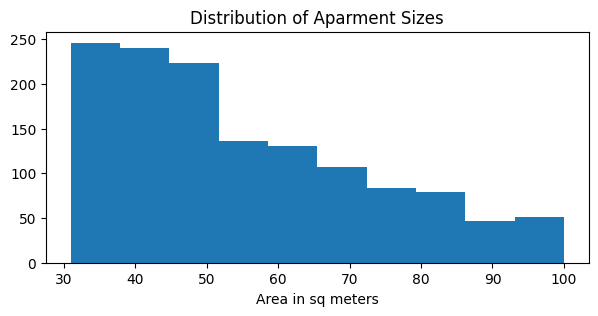

In [87]:
fig,ax = plt.subplots(figsize=(7,3))
ax.hist(df["surface_covered_in_m2"])
ax.set_xlabel("Area in sq meters")
ax.set_title("Distribution of Aparment Sizes")

Text(0.5, 1.0, 'Beunos Aires: Price vs Area')

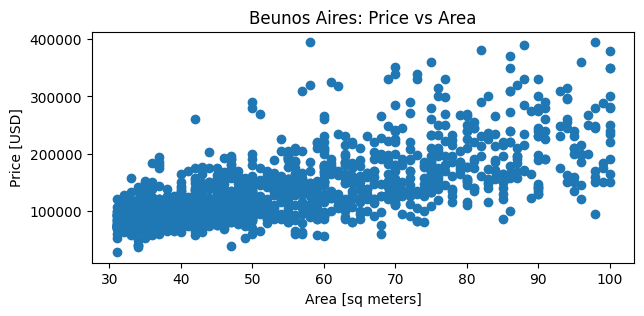

In [88]:
fig,ax = plt.subplots(figsize=(7,3))
ax.scatter(df["surface_covered_in_m2"], df["price_aprox_usd"])
ax.set_xlabel("Area [sq meters]")
ax.set_ylabel("Price [USD]")
ax.set_title("Beunos Aires: Price vs Area")

In [89]:
p_coefficient = df["surface_covered_in_m2"].corr(df["price_aprox_usd"])
print(p_coefficient)

0.6868188329865075


### Machine Learning

#### Linear Models
- Linear models are all about straigth lines.
- Linear models are very concerned with distance
- With linear models we are trying to find a line that best fits our data
- Linear model uses an algorithm which tries to minimise the distance.
- Linear models works best when our data has a linear relationship
- When we don't have a linear relationship, it is better to use some other machine learning model. 

<p style="color:orange">Splitting the data</p>Their are couple of splits that we do in our data. The most common ones are-

- Feature Metrics and Target Vector
- We use "X" for feature metrics and "y" for target_vector

In [90]:
features = ["surface_covered_in_m2"]
X_train = df[features]
print(X_train.shape)
X_train.head()

(1343, 1)


,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


In [91]:
target = "price_aprox_usd"
y_train = df[target]
print(y_train.shape)
y_train

(1343,)


4       129000.00
9        87000.00
29      118000.00
40       57000.00
41       90000.00
          ...    
8589     73536.95
8590    119000.00
8593     62000.00
8601    125000.00
8604     78000.00
Name: price_aprox_usd, Length: 1343, dtype: float64

##### Setting up a baseline for benchmark

- Baseline - We need to decide a benchmark for our model to pass in order to get call it a good model.
    - We call it a Naive model
- Then we need to decide that is it a regression problem or classification problem
    - Are we predicting a dicrete values or continuous values

In [92]:
y_train_mean = y_train.mean()
print(y_train_mean)

135527.83871928515


In [93]:
y_pred_baseline = [y_train_mean] * len(y_train)
print(len(y_pred_baseline) == len(y_train))
y_pred_baseline[:5]

True


[np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515)]

<p style="color:orange">Baseline Scatter Plot</p>

To plot the chart in matplotlib, we actully need one column in both x axis and y axis. We can achive that by
- X_train["column_name"]
- X_train.values (But in this case as well, X_train should only have one column)

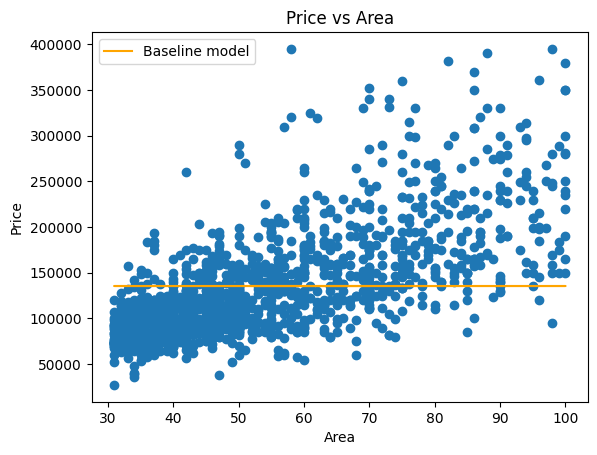

In [94]:
from data_wrangling_pipeline import input_for_matplotlib
fig,ax = plt.subplots()
ax.plot(X_train.values, y_pred_baseline, color="orange", label="Baseline model")
ax.scatter(X_train,y_train)
ax = input_for_matplotlib(ax)
ax.legend()
plt.show()


<p style="color:orange">Measuring Perfomance metrics for Linear regression</p>

- The most popular performance metrics for linear regression is mean squared error.

In [95]:
mae_baseline = mean_absolute_error(y_true=y_train,y_pred=y_pred_baseline)
print("Mean apt price", round(y_train_mean,2))
print("Baseline MAE:", round(mae_baseline,2))

Mean apt price 135527.84
Baseline MAE: 45199.46


What this means is that, if on an average I choose the mean price (135527.84) of the houses as the actual price of every house, then on an average, I would be wrong by 45199.46 USD which is our Mean absolute error.

<p style="color:yellow; font-weight: bold"> This means that in order for our model to be useful, we want our baseline mean absolute error to be less than 45199.46</p>

#### <p style="color:orange; font-size:25px">Instantiate a Model</p>

Their are three steps in building the model: 
- Creating/Intantiating a model
- Train a model
- Use that model to predict

In [96]:
linear_model = LinearRegression()   # We have instantiated a model

In [97]:
linear_model.fit(X=X_train,y=y_train)   # Training the model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_predicted = linear_model.predict(X_train) # Made predictions using the model
y_predicted[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

<p style="color:orange; font-size:20px">Evaluating the trained model</p>

In [99]:
mae_training = mean_absolute_error(y_true=y_train,y_pred=y_predicted)
print("Training MAE:", round(mae_training,2))

Training MAE: 31248.26


#### Analysis on prediction and using prediction
When we say price as a function of Area, we can describe it as -

- y - mx+b
-   where y = Price
    -   x = area
    -   m = coefficient of this x/Slope of the line
    -   b = y-intercept

In [104]:
intercept = round(linear_model.intercept_,2)
print(intercept)
coefficient = round(linear_model.coef_[0],2)
print(f"Our coefficient is {coefficient} and intercept is {intercept}.")

11433.31
Our coefficient is 2253.12 and intercept is 11433.31.


In [113]:
print(f"apt_price = {intercept} + {coefficient} * surface_covered")

apt_price = 11433.31 + 2253.12 * surface_covered


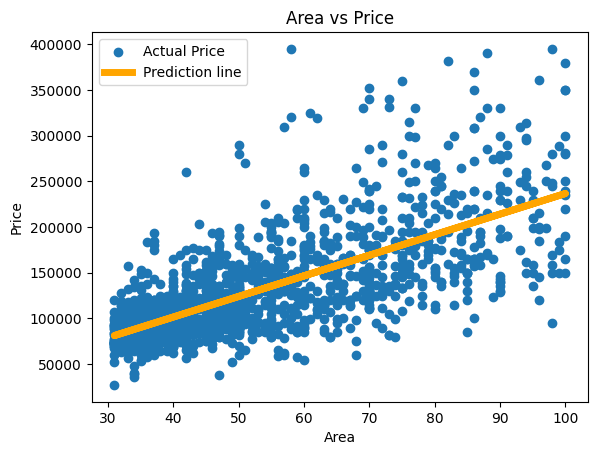

In [124]:
fig, ax = plt.subplots()
ax.scatter(X_train,y_train, label="Actual Price")
ax.plot(X_train,y_predicted, label="Prediction line", color="orange", linewidth=5)
# ax.scatter(X_train,y_predicted, label="Prediction line", color="orange") This will also work
ax = input_for_matplotlib(ax)
ax.legend()
plt.show()